<a href="https://colab.research.google.com/github/MSURENDRAN/ADVANCE_MACHINE_LEARNING_LAB/blob/main/2348527_Lab03_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/Program_3b_dataset.csv')
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

<Figure size 1200x1000 with 0 Axes>

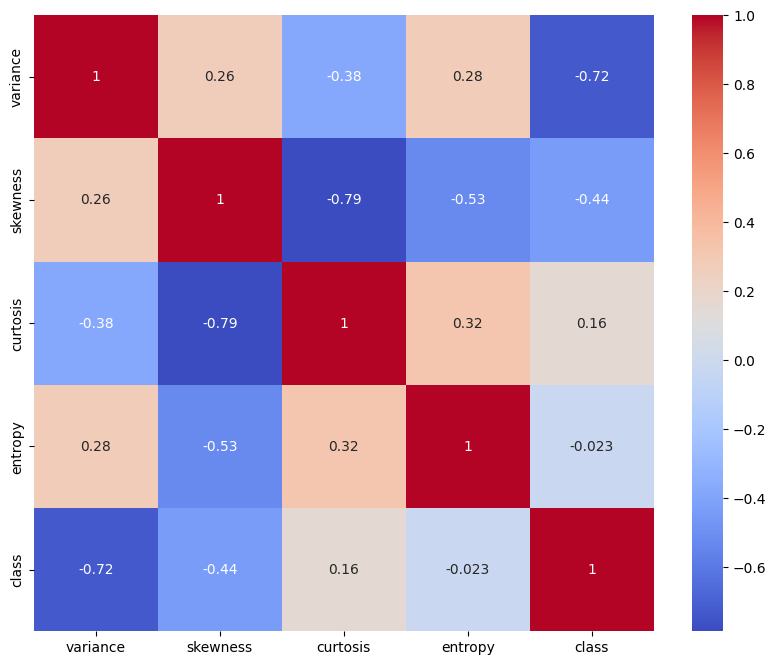

In [ ]:
ref=['variance','skewness','curtosis','entropy','class']
plt.figure(figsize = (12,10))
df = data[ref]
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
feature=['variance','skewness','curtosis','entropy']
X=data[feature]
y=data[['class']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
train_predictions = reg.predict(X_train)
test_predictions = reg.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

print("Classification Report for Training Set:")
print(classification_report(y_train, train_predictions))

print("Classification Report for Test Set:")
print(classification_report(y_test, test_predictions))

print("Confusion Matrix for Training Set:")
print(confusion_matrix(y_train, train_predictions))

print("Confusion Matrix for Test Set:")
print(confusion_matrix(y_test, test_predictions))

Training Accuracy: 0.9917
Test Accuracy: 0.9879
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       533
           1       0.98      1.00      0.99       427

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

Confusion Matrix for Training Set:
[[526   7]
 [  1 426]]
Confusion Matrix for Test Set:
[[226   3]
 [  2 181]]


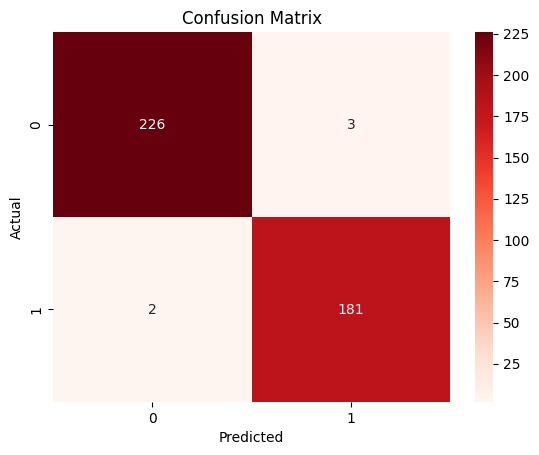

In [ ]:
conf_matrix = confusion_matrix(y_test, test_predictions)
sns.heatmap(conf_matrix, annot=True, cmap="Reds", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

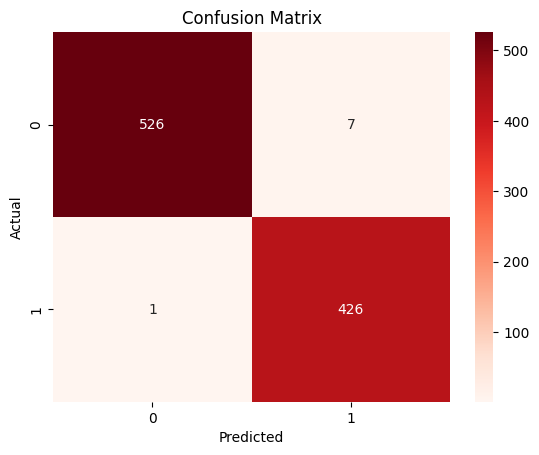

In [ ]:
conf_matrix = confusion_matrix(y_train, train_predictions)
sns.heatmap(conf_matrix, annot=True, cmap="Reds", fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()